


4/4 [==============================] - 0s 2ms/step


Epoch: 0, Discriminator Loss: 0.7880231738090515, Generator Loss: 0.7607594132423401
4/4 [==============================] - 0s 1ms/step
Epoch: 100, Discriminator Loss: 0.006535510998219252, Generator Loss: 5.017393589019775
4/4 [==============================] - 0s 2ms/step
Epoch: 200, Discriminator Loss: 0.35747528076171875, Generator Loss: 4.122833251953125
4/4 [==============================] - 0s 2ms/step
Epoch: 300, Discriminator Loss: 1.6200255155563354, Generator Loss: 3.6647143363952637
4/4 [==============================] - 0s 1ms/step
Epoch: 400, Discriminator Loss: 0.5546069517731667, Generator Loss: 3.0711658000946045
4/4 [==============================] - 0s 1ms/step
Epoch: 500, Discriminator Loss: 0.43775223195552826, Generator Loss: 4.8939313888549805
4/4 [==============================] - 0s 1ms/step
Epoch: 600, Discriminator Loss: 0.13500969856977463, Generator Loss: 4.331814765930176
4/4 [========================

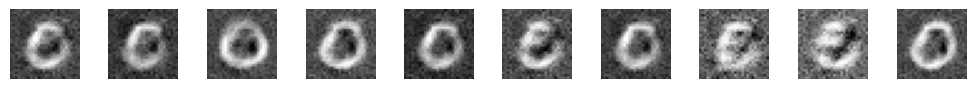

1/1 [==============================] - 0s 14ms/step


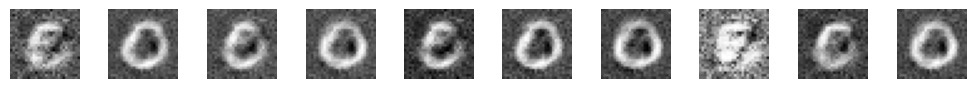

1/1 [==============================] - 0s 15ms/step


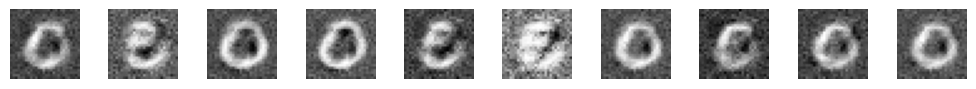

1/1 [==============================] - 0s 16ms/step


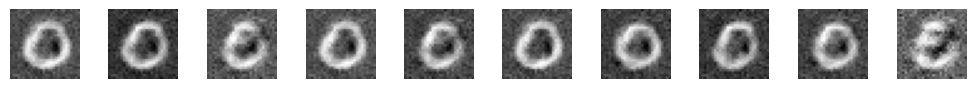

1/1 [==============================] - 0s 16ms/step


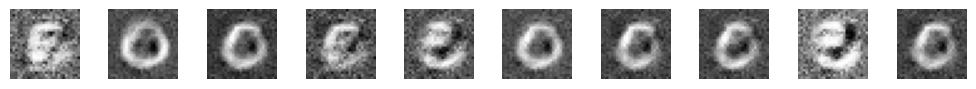

1/1 [==============================] - 0s 17ms/step


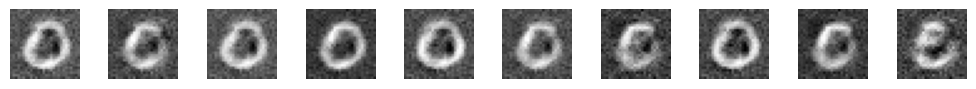

1/1 [==============================] - 0s 19ms/step


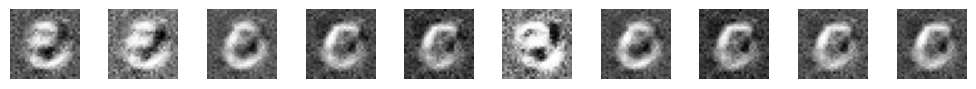

1/1 [==============================] - 0s 15ms/step


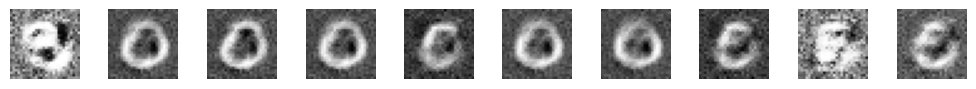

1/1 [==============================] - 0s 14ms/step


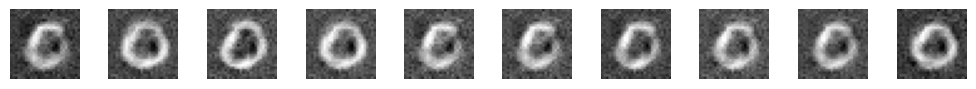

1/1 [==============================] - 0s 15ms/step


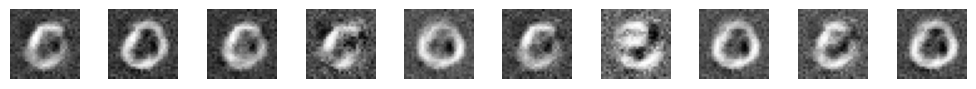

In [1]:
# 필요한 라이브러리 불러오기
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# MNIST 데이터셋 불러오기
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # 정규화
x_train = np.expand_dims(x_train, axis=-1)  # 채널 차원 추가

# 하이퍼파라미터 설정
latent_dim = 100  # 생성자가 받을 입력 벡터의 차원
batch_size = 128
epochs = 10000

# 생성자 모델 정의
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.Dense(512, activation='relu'),
        layers.Dense(1024, activation='relu'),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# 구분자 모델 정의
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# 모델 컴파일
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GAN 모델 정의
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# 훈련 함수 정의
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # 진짜 이미지 샘플링
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]

        # 가짜 이미지 생성
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        # 구분자 훈련
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 생성자 훈련
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # 손실 출력
        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}')

# GAN 훈련 시작
train_gan(epochs, batch_size)

# 생성된 이미지 시각화
def plot_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # 정규화를 되돌림

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_epoch_{epoch}.png')
    plt.show()

# 특정 에포크마다 생성된 이미지 저장
for epoch in range(0, epochs, 1000):
    plot_generated_images(epoch, generator)
